In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import selectFromModel


ImportError: cannot import name 'selectFromModel' from 'sklearn.feature_selection' (C:\MiniConda\Lib\site-packages\sklearn\feature_selection\__init__.py)

In [2]:
file_path="Ruby.csv"

In [3]:
#load the csv file into a dataframe
data=pd.read_csv("Ruby.csv",encoding='unicode_escape')

In [4]:
data.head()

,Sample no,As,pH,EC,TDS,Cl,SO4,NO3,Fe,Mn,Na,K,Ca,Mg,HCO3,PO4
0,1,25,6.90,2000,770,12.34,1.13,0.10,0.38,0.38,68.23,3.13,195.59,151.69,400.32,1.22
1,2,20,7.46,885,250,11.09,0.12,0.07,0.29,0.79,40.14,2.00,83.37,51.54,450.36,0.71
2,3,50,7.95,890,210,14.11,0.07,0.04,0.44,0.74,32.79,2.87,41.68,51.54,350.28,1.08
3,4,10,7.02,828,250,13.94,0.11,0.06,0.52,0.52,22.38,1.91,80.16,35.98,500.40,0.92
4,5,23,7.35,905,240,12.74,0.76,0.61,0.01,0.01,33.22,2.15,101.00,33.06,350.28,0.52


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample no  30 non-null     int64  
 1   As         30 non-null     int64  
 2   pH         30 non-null     float64
 3   EC         30 non-null     int64  
 4    TDS       30 non-null     int64  
 5    Cl        30 non-null     float64
 6   SO4        30 non-null     float64
 7   NO3        30 non-null     float64
 8   Fe         30 non-null     float64
 9   Mn         30 non-null     float64
 10  Na         30 non-null     float64
 11  K          30 non-null     float64
 12  Ca         30 non-null     float64
 13  Mg         30 non-null     float64
 14  HCO3       30 non-null     float64
 15  PO4        30 non-null     float64
dtypes: float64(12), int64(4)
memory usage: 3.9 KB


In [23]:
#step 1:Define a threshold amnd convert to Binary Labels
threshold = 10 # adjust threshold based on data
binary_labels = np.where(data["As"]> threshold,1,0)
data["As_binary"] = binary_labels

In [24]:
#step 2: Split the Data
xtrain,xtest,ytrain,ytest=train_test_split(data.drop(["As","As_binary"],axis=1),binary_labels,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(21, 15) (9, 15) (21,) (9,)


In [25]:
# Step 3:standard scaling
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


In [26]:
# Step 4:Feature selection using L1 Regularization (Logistic Regression
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]
print("Accuracy : ", accuracy_score(ytest,pred))

Accuracy :  0.8888888888888888


In [27]:
print("Precision :",precision_score(ytest,pred))
print("Recall:",recall_score(ytest,pred))
print(specificity(ytest,pred))

Precision : 1.0
Recall: 0.8888888888888888


NameError: name 'specificity' is not defined

In [28]:
print("confusion_matrix :",confusion_matrix(ytest,pred))

confusion_matrix : [[0 0]
 [1 8]]


In [41]:
xn=scaler.fit_transform(xtrain)

In [43]:
model1 = class.predict(xn)
print(model)

SyntaxError: invalid syntax (4012060064.py, line 1)

In [29]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]

print(accuracy_score(y_pred,ytest))
#print("ROC_AUC Score:",AUC_RF)

1.0


In [30]:
from xgboost import XGBClassifier
xgb=XGBClassifier(eta=0.05)
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)

print(accuracy_score(y_predict,ytest))

1.0


In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
y_pred = classifier.predict(xtest)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print(accuracy_score(y_pred,ytest))

1.0


In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
y_pred = classifier.predict(xtest)

# Making the Confusion Matrix
print(accuracy_score(y_pred,ytest))
print(precision_score(ytest,pred))
print(recall_score(ytest,pred))

print(confusion_matrix(ytest,pred))

0.5555555555555556
1.0
0.8888888888888888
[[0 0]
 [1 8]]


In [33]:
print("Precision :",precision_score(ytest,pred))
print("Recall:",recall_score(ytest,pred))

print("confusion_matrix :",confusion_matrix(ytest,pred))

Precision : 1.0
Recall: 0.8888888888888888
confusion_matrix : [[0 0]
 [1 8]]


In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
y_pred = classifier.predict(xtest)
print(accuracy_score(y_pred,ytest))
print("Precision :",precision_score(ytest,pred))
print("Recall:",recall_score(ytest,pred))

print("confusion_matrix :",confusion_matrix(ytest,pred))

0.8888888888888888
Precision : 1.0
Recall: 0.8888888888888888
confusion_matrix : [[0 0]
 [1 8]]


In [35]:
print("Precision :",precision_score(ytest,pred))
print("Recall:",recall_score(ytest,pred))

print("confusion_matrix :",confusion_matrix(ytest,pred))

Precision : 1.0
Recall: 0.8888888888888888
confusion_matrix : [[0 0]
 [1 8]]


In [36]:
data

,Sample no,As,pH,EC,TDS,Cl,SO4,NO3,Fe,Mn,Na,K,Ca,Mg,HCO3,PO4,As_binary
0,1,25,6.90,2000,770,12.34,1.13,0.10,0.38,0.38,68.23,3.13,195.59,151.69,400.32,1.22,1
1,2,20,7.46,885,250,11.09,0.12,0.07,0.29,0.79,40.14,2.00,83.37,51.54,450.36,0.71,1
2,3,50,7.95,890,210,14.11,0.07,0.04,0.44,0.74,32.79,2.87,41.68,51.54,350.28,1.08,1
3,4,10,7.02,828,250,13.94,0.11,0.06,0.52,0.52,22.38,1.91,80.16,35.98,500.40,0.92,0
4,5,23,7.35,905,240,12.74,0.76,0.61,0.01,0.01,33.22,2.15,101.00,33.06,350.28,0.52,1
5,6,27,7.05,1043,320,13.29,0.18,0.13,0.24,0.80,40.00,2.21,128.26,24.31,500.40,0.86,1
6,7,18,7.44,642,200,14.04,0.22,0.94,0.43,0.43,31.53,1.66,107.41,23.34,350.28,0.74,1
7,8,26,7.49,366,120,14.93,0.65,0.57,0.34,0.34,37.50,1.82,67.33,11.67,250.20,0.41,1
8,9,40,6.98,1270,380,14.73,0.34,0.27,0.32,0.32,35.56,1.25,166.73,37.92,550.44,1.80,1
9,10,27,6.99,1015,250,13.98,0.72,0.60,0.11,0.81,37.10,1.28,81.76,34.03,450.36,0.55,1


In [37]:
x=data.drop(["As_binary","Sample no"],axis=1) #contain all  independent variable
y=data["As_binary"]   

[0.16319464 0.03671884 0.03221036 0.0234693  0.03206968 0.06197225
 0.04419802 0.13077821 0.05498989 0.16767606 0.02744311 0.07232707
 0.04473062 0.05091802 0.05730394]


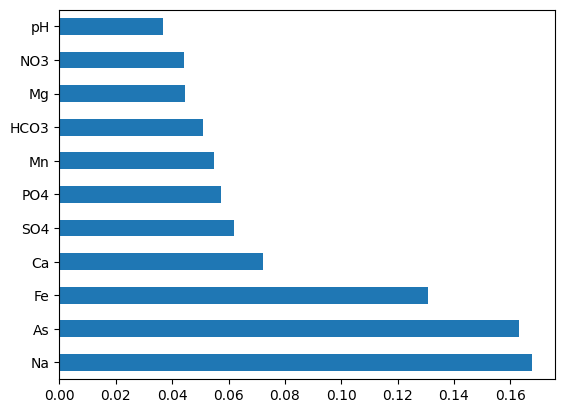

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [43]:
#specify features and target variables
features = ["HCO3", "PH", "SO4", "NO3", "Fe", "Mn", "Na", "Ca", "Mg", "PO4"] 
target_variable = ["As"]


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the features and target_variable
# For demonstration, I'll create a dummy DataFrame

# Creating a dummy DataFrame with random data
np.random.seed(42)
data = np.random.rand(100, len(features) + len(target_variable))
df = pd.data(data, columns=features + target_variable)

# Generating correlation matrix
corr_matrix = df.corr()

# Selecting correlation values related to the target variable
corr_with_target = corr_matrix[target_variable]

# Plotting heatmap for correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

AttributeError: module 'pandas' has no attribute 'data'

In [44]:
#Create a subset of the dataframe with selected features
selected_features = data["features" ,"target_variable"]

In [50]:
#Calculate the Pearsion correlation matrix
correlation_matrix = selected_features()

TypeError: 'list' object is not callable

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check the shape of the correlation matrix
print(correlation_matrix)


['features', 'target_variable']


In [47]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title("Pearson correlation map")
plt.show()


IndexError: Inconsistent shape between the condition and the input (got (2, 1) and (2,))

<Figure size 1000x800 with 0 Axes>